In [25]:
import pandas as pd
import json
import numbers
import string

import matplotlib.pyplot as plt
import seaborn as sns


# PART 1: Parsing My own Dataset

In [26]:
df = pd.read_csv('Connections.csv', skiprows = 3)
df.head()

,First Name,Last Name,URL,Email Address,Company,Position,Connected On
0,Ashley,Lynn,https://www.linkedin.com/in/ashley-lynn-40a088251,NaN,NaN,NaN,17 Mar 2025
1,Maleda,Sims,https://www.linkedin.com/in/maleda-sims,NaN,Comprehensive Healthcare,Behavioral Health Associate,17 Mar 2025
2,Siena,Kinsley,https://www.linkedin.com/in/siena-kinsley2027,NaN,Paisley's Tea Room,Chef,17 Mar 2025
3,Arina,Gushchina,https://www.linkedin.com/in/arina-gushchina-95...,NaN,Goldman Sachs,2025 Goldman Sachs Possibilities Summit,17 Mar 2025
4,Alex,Ochoa,https://www.linkedin.com/in/alex-ochoa-b0a846355,NaN,Whitman College,Financial Aid Student Worker,17 Mar 2025


In [27]:
df.tail()

,First Name,Last Name,URL,Email Address,Company,Position,Connected On
180,Arham,Khan,https://www.linkedin.com/in/arhamkhan99,NaN,Beta Theta Pi,VP of Communications and DEI,13 Sep 2024
181,John,Leeds,https://www.linkedin.com/in/john-leeds,NaN,Jane Street,Software Engineer Intern,13 Sep 2024
182,Vinny,Fertrin,https://www.linkedin.com/in/vinny-fertrin,NaN,HiddenLayer,Software Engineer Intern,13 Sep 2024
183,Mohamed,Abonazel,https://www.linkedin.com/in/mohamed-abonazel4,NaN,iVolve Technologies,DevOps Engineer,13 Sep 2024
184,Aaron,Lefohn,https://www.linkedin.com/in/aaronlefohn,NaN,NVIDIA,Vice President of Graphics Research,03 Jan 2024


In [28]:
df = df.rename(columns = {'Connected On': 'timestamp'})
df

,First Name,Last Name,URL,Email Address,Company,Position,timestamp
0,Ashley,Lynn,https://www.linkedin.com/in/ashley-lynn-40a088251,NaN,NaN,NaN,17 Mar 2025
1,Maleda,Sims,https://www.linkedin.com/in/maleda-sims,NaN,Comprehensive Healthcare,Behavioral Health Associate,17 Mar 2025
2,Siena,Kinsley,https://www.linkedin.com/in/siena-kinsley2027,NaN,Paisley's Tea Room,Chef,17 Mar 2025
3,Arina,Gushchina,https://www.linkedin.com/in/arina-gushchina-95...,NaN,Goldman Sachs,2025 Goldman Sachs Possibilities Summit,17 Mar 2025
4,Alex,Ochoa,https://www.linkedin.com/in/alex-ochoa-b0a846355,NaN,Whitman College,Financial Aid Student Worker,17 Mar 2025
...,...,...,...,...,...,...,...
180,Arham,Khan,https://www.linkedin.com/in/arhamkhan99,NaN,Beta Theta Pi,VP of Communications and DEI,13 Sep 2024
181,John,Leeds,https://www.linkedin.com/in/john-leeds,NaN,Jane Street,Software Engineer Intern,13 Sep 2024
182,Vinny,Fertrin,https://www.linkedin.com/in/vinny-fertrin,NaN,HiddenLayer,Software Engineer Intern,13 Sep 2024
183,Mohamed,Abonazel,https://www.linkedin.com/in/mohamed-abonazel4,NaN,iVolve Technologies,DevOps Engineer,13 Sep 2024


In [29]:
df['timestamp'].unique()

array(['17 Mar 2025', '13 Mar 2025', '10 Mar 2025', '09 Mar 2025',
       '08 Mar 2025', '12 Feb 2025', '04 Feb 2025', '29 Jan 2025',
       '18 Jan 2025', '10 Jan 2025', '06 Jan 2025', '04 Jan 2025',
       '29 Dec 2024', '27 Dec 2024', '23 Dec 2024', '21 Dec 2024',
       '20 Dec 2024', '19 Dec 2024', '18 Dec 2024', '16 Dec 2024',
       '06 Dec 2024', '05 Dec 2024', '03 Dec 2024', '25 Nov 2024',
       '22 Nov 2024', '20 Nov 2024', '19 Nov 2024', '18 Nov 2024',
       '17 Nov 2024', '16 Nov 2024', '10 Nov 2024', '06 Nov 2024',
       '03 Nov 2024', '01 Nov 2024', '29 Oct 2024', '28 Oct 2024',
       '26 Oct 2024', '25 Oct 2024', '24 Oct 2024', '23 Oct 2024',
       '22 Oct 2024', '21 Oct 2024', '20 Oct 2024', '19 Oct 2024',
       '18 Oct 2024', '16 Oct 2024', '15 Oct 2024', '14 Oct 2024',
       '13 Oct 2024', '12 Oct 2024', '11 Oct 2024', '10 Oct 2024',
       '08 Oct 2024', '07 Oct 2024', '06 Oct 2024', '03 Oct 2024',
       '02 Oct 2024', '01 Oct 2024', '28 Sep 2024', '27 Sep 20

In [30]:
timestamp = pd.to_datetime(df['timestamp'])
timestamp

,timestamp
0,2025-03-17
1,2025-03-17
2,2025-03-17
3,2025-03-17
4,2025-03-17
...,...
180,2024-09-13
181,2024-09-13
182,2024-09-13
183,2024-09-13


In [31]:
df_timestamp = pd.DataFrame(timestamp)
df_timestamp

,timestamp
0,2025-03-17
1,2025-03-17
2,2025-03-17
3,2025-03-17
4,2025-03-17
...,...
180,2024-09-13
181,2024-09-13
182,2024-09-13
183,2024-09-13


In [32]:
df_timestamp.to_csv('dia-timestamp.csv')

# PART 2: Analyzing my Partner's Data

In [33]:
# upload the data
df_timestamp = pd.read_csv('timestamps.csv')
df_timestamp.head()

,Unnamed: 0,endTime
0,0,2024-04-13 23:48
1,1,2024-04-14 18:24
2,2,2024-04-14 18:28
3,3,2024-04-14 19:41
4,4,2024-04-14 19:43


In [34]:
df_timestamp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3064 entries, 0 to 3063
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  3064 non-null   int64 
 1   endTime     3064 non-null   object
dtypes: int64(1), object(1)
memory usage: 48.0+ KB


In [35]:
# Changing the data formate to a datetime
dates = pd.to_datetime(df_timestamp['endTime'])
df_date = pd.DataFrame(dates)
df_date

,endTime
0,2024-04-13 23:48:00
1,2024-04-14 18:24:00
2,2024-04-14 18:28:00
3,2024-04-14 19:41:00
4,2024-04-14 19:43:00
...,...
3059,2025-04-14 21:25:00
3060,2025-04-14 21:32:00
3061,2025-04-14 21:34:00
3062,2025-04-14 21:39:00


**Time difference**

In [36]:
# Finding the time difference between each event
df_date['time_difference'] = df_date['endTime'].diff()
df_date

,endTime,time_difference
0,2024-04-13 23:48:00,NaT
1,2024-04-14 18:24:00,0 days 18:36:00
2,2024-04-14 18:28:00,0 days 00:04:00
3,2024-04-14 19:41:00,0 days 01:13:00
4,2024-04-14 19:43:00,0 days 00:02:00
...,...,...
3059,2025-04-14 21:25:00,0 days 00:03:00
3060,2025-04-14 21:32:00,0 days 00:07:00
3061,2025-04-14 21:34:00,0 days 00:02:00
3062,2025-04-14 21:39:00,0 days 00:05:00


In [37]:
# What is the longest time difference?

longest_time_difference = max(df_date['time_difference'][1:])
c = longest_time_difference.components # I am using timedelta instead. Source -- https://pandas.pydata.org/docs/reference/api/pandas.Timedelta.components.html
if c.days == 0:
  print("Longest time difference:",c.hours, 'hours' , c.minutes , 'minutes' , c.seconds , 'seconds')
else:
  print("Longest time difference:",c.days, 'days', c.hours, 'hours' , c.minutes , 'minutes' , c.seconds , 'seconds')

end_date = df_date.iloc[df_date['time_difference'].tolist().index(longest_time_difference)]['endTime']
start_date = df_date.iloc[df_date['time_difference'].tolist().index(longest_time_difference) -1 ]['endTime']

print('Happened from', start_date.date(), 'until', end_date.date())


Longest time difference: 10 days 1 hours 13 minutes 0 seconds
Happened from 2025-01-31 until 2025-02-10


In [38]:
# What is the average time difference

avg_time_differece = df_date['time_difference'][1:].mean()
c = avg_time_differece.components
if c.days == 0:
  print("Avergae time difference:",c.hours, 'hours' , c.minutes , 'minutes' , c.seconds , 'seconds')
else:
  print("Avergae time difference:",c.days, 'days', c.hours, 'hours' , c.minutes , 'minutes' , c.seconds , 'seconds')

Avergae time difference: 2 hours 52 minutes 1 seconds


In [39]:
# Which day with the most timestamps with how many events on that day?

counting_days = df_date['endTime'].apply(lambda x: x.day).value_counts()

days_most_events = counting_days.index[0]
num_of_events = counting_days.values[0]

print('The day with the most timestamps is:', days_most_events)
print('And',num_of_events, 'events happened on those days')


The day with the most timestamps is: 28
And 188 events happened on those days


In [40]:
# Which month with the most timestamps with how many events on that month?

counting_months = df_date['endTime'].apply(lambda x: x.month).value_counts()

month_most_events = counting_months.index[0]
num_of_events = counting_months.values[0]

print('The month with the most timestamps is:', month_most_events)
print('And',num_of_events, 'events happened on that month')


The month with the most timestamps is: 6
And 488 events happened on that month


**Visualizing the findings**

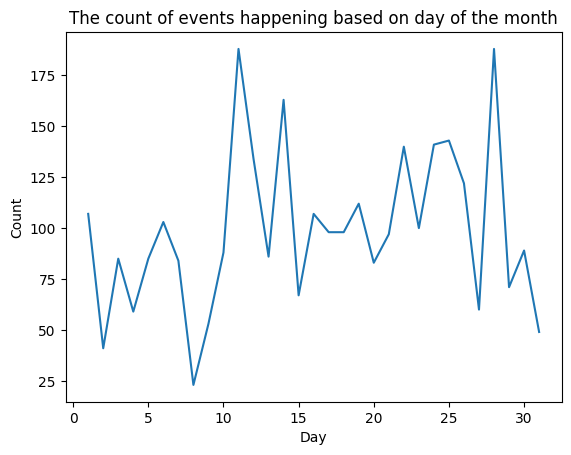

In [41]:
# Comparing amount of events occurances based on the day

count_days_df = pd.DataFrame({'Day':list(counting_days.index),'Count':list(counting_days.values)})

sns.lineplot(x = 'Day', y = 'Count', data = count_days_df)

plt.title("The count of events happening based on day of the month")
plt.show()

I don't think I can get anything with this data. It seems like there is no trend when the days of the month are compared.


Except for the end of the fourth week and the start of the second week. There is more timestamps on the 28th and 12th than other days of the months. That means the event happens more during those days of the month - probably during the weekends.

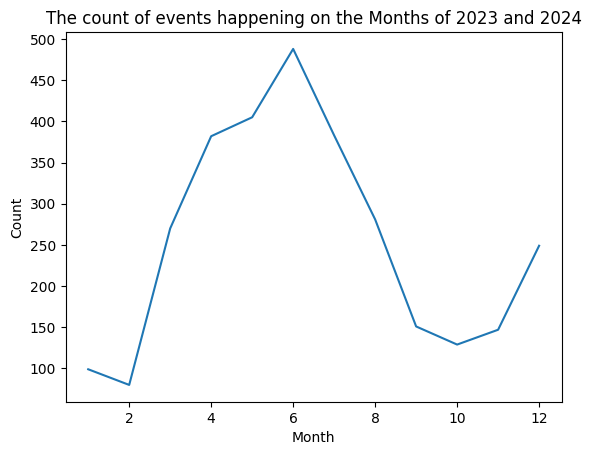

In [42]:
# Comparing amount of events occurances based on the month

count_months_df = pd.DataFrame({'Month':list(counting_months.index),'Count':list(counting_months.values)})

sns.lineplot(x = 'Month', y = 'Count', data = count_months_df)

plt.title("The count of events happening on the Months of 2023 and 2024")
plt.show()

The event occures the most starting from Feburary and peakes at June then rapidlly declines till the end of summer.

So this event occures more as school comes closer to end. Meaning that the event is probably tied up with school work getting heavier. Another evidence of this is the rapid decline in summer and the increase in November.  

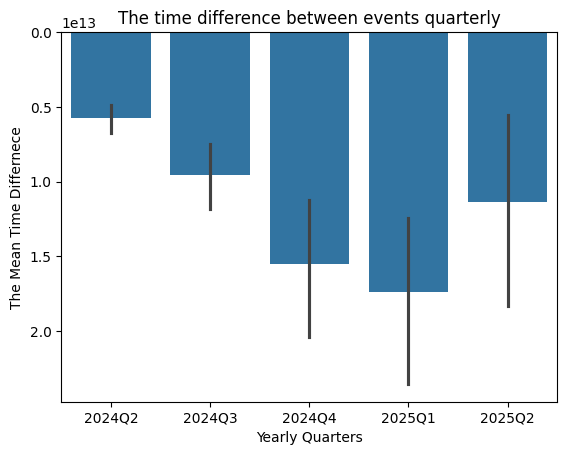

In [43]:
df_date['quarters'] = df_date['endTime'].dt.to_period('Q')
sns.barplot(x = 'quarters', y = 'time_difference', data = df_date)

plt.title('The time difference between events quarterly')
plt.xlabel('Yearly Quarters')
plt.ylabel('The Mean Time Differnece')
plt.show()

Time difference is negatively correlated with the number of events.

The time difference gradually started increasing from the second quarter of 2024. eventually tripled during the gradual increase compared from the start of 2024. The time difference peaked at 2025 Q1 and then declined rapidlly.

Time diffenrece in 2024Q2 (April - June) is low due to more events happening. As we get into summer 2024Q3, the time difference almost doubled, meaning there is more time between events and therefore less events.

During the last graph, I said that the end of 2024 as the finals of the Fall semester comes there is more events. However here, the time difference in 2024Q4 is even higher than summer, meaning there is less occurences of the event during th finals.

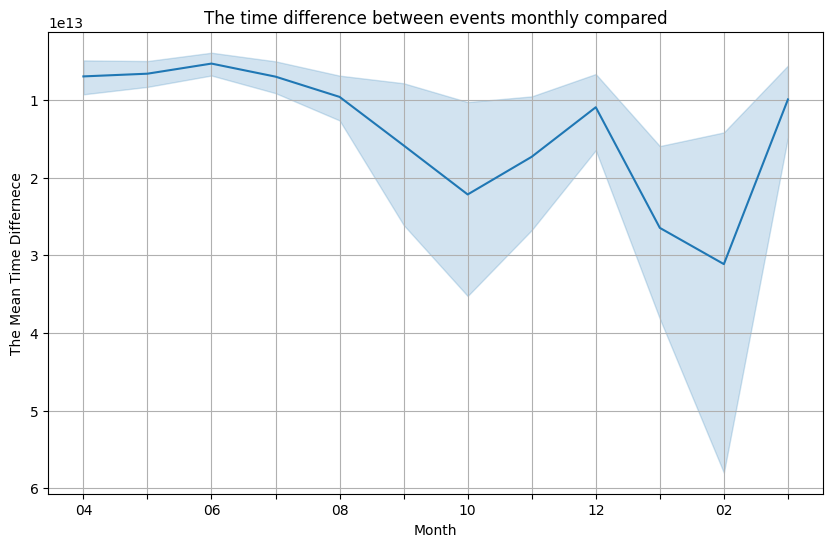

In [44]:


df_date['month'] = df_date['endTime'].dt.to_period('M').astype(str).apply(lambda x: x[5:])

fig, ax = plt.subplots(figsize=(10,6))

sns.lineplot(x = 'month', y = 'time_difference', data = df_date)

plt.title('The time difference between events monthly compared')
plt.xlabel('Month')
plt.ylabel('The Mean Time Differnece')

for i, label in enumerate(ax.get_xticklabels()):
    if i % 2 == 1:
        label.set_visible(False)


plt.grid()
plt.show()

the time difference stays relatively low until the gradual increase from June, i.e. the event been occuring more before the start of summer and then gradually decreases in summer.

At the start of the semester, the gradual increase stays consistent then as the midterms get closer, time difference rapidlly decreases and then picks up during winter break.

**Data Source**

I am guessing this data is concerned with schoolwork. The amount of events occur rapidly during finals and decrease in summer and winter breaks. However, the event hasn't been occuring similar between the Fall and Spring semesters. The events happen more at the end of Spring than the end of Fall - so it might be related to the weather.

My guess is Chrome search history data.

# PART 3: Combined Visualization

In [45]:
# laoding the data
dia = pd.read_csv('dia-timestamp.csv')

ronnie = pd.read_csv('timestamps.csv')

In [46]:
# Change timestamp to datetime format
dia['timestamp'] = pd.to_datetime(dia['timestamp'])
dia

,Unnamed: 0,timestamp
0,0,2025-03-17
1,1,2025-03-17
2,2,2025-03-17
3,3,2025-03-17
4,4,2025-03-17
...,...,...
180,180,2024-09-13
181,181,2024-09-13
182,182,2024-09-13
183,183,2024-09-13


In [47]:
# Change ednTime to datetime format
ronnie['endTime'] = pd.to_datetime(ronnie['endTime'])
ronnie

,Unnamed: 0,endTime
0,0,2024-04-13 23:48:00
1,1,2024-04-14 18:24:00
2,2,2024-04-14 18:28:00
3,3,2024-04-14 19:41:00
4,4,2024-04-14 19:43:00
...,...,...
3059,3059,2025-04-14 21:25:00
3060,3060,2025-04-14 21:32:00
3061,3061,2025-04-14 21:34:00
3062,3062,2025-04-14 21:39:00


In [48]:
# Create a month column
dia['month'] = dia['timestamp'].dt.to_period('M')
dia = dia.sort_values('timestamp').reset_index()
dia

,index,Unnamed: 0,timestamp,month
0,184,184,2024-01-03,2024-01
1,179,179,2024-09-13,2024-09
2,180,180,2024-09-13,2024-09
3,183,183,2024-09-13,2024-09
4,182,182,2024-09-13,2024-09
...,...,...,...,...
180,4,4,2025-03-17,2025-03
181,3,3,2025-03-17,2025-03
182,2,2,2025-03-17,2025-03
183,1,1,2025-03-17,2025-03


In [49]:
# time difference between each event
dia['diff'] = dia['timestamp'].diff()
dia

,index,Unnamed: 0,timestamp,month,diff
0,184,184,2024-01-03,2024-01,NaT
1,179,179,2024-09-13,2024-09,254 days
2,180,180,2024-09-13,2024-09,0 days
3,183,183,2024-09-13,2024-09,0 days
4,182,182,2024-09-13,2024-09,0 days
...,...,...,...,...,...
180,4,4,2025-03-17,2025-03,0 days
181,3,3,2025-03-17,2025-03,0 days
182,2,2,2025-03-17,2025-03,0 days
183,1,1,2025-03-17,2025-03,0 days


In [50]:
# Create a month column
ronnie['month'] = ronnie['endTime'].dt.to_period('M')
ronnie = ronnie.sort_values('endTime')
ronnie

,Unnamed: 0,endTime,month
0,0,2024-04-13 23:48:00,2024-04
1,1,2024-04-14 18:24:00,2024-04
2,2,2024-04-14 18:28:00,2024-04
3,3,2024-04-14 19:41:00,2024-04
4,4,2024-04-14 19:43:00,2024-04
...,...,...,...
3059,3059,2025-04-14 21:25:00,2025-04
3060,3060,2025-04-14 21:32:00,2025-04
3061,3061,2025-04-14 21:34:00,2025-04
3062,3062,2025-04-14 21:39:00,2025-04


In [51]:
# time difference between each event
ronnie['diff'] = ronnie['endTime'].diff()
ronnie

,Unnamed: 0,endTime,month,diff
0,0,2024-04-13 23:48:00,2024-04,NaT
1,1,2024-04-14 18:24:00,2024-04,0 days 18:36:00
2,2,2024-04-14 18:28:00,2024-04,0 days 00:04:00
3,3,2024-04-14 19:41:00,2024-04,0 days 01:13:00
4,4,2024-04-14 19:43:00,2024-04,0 days 00:02:00
...,...,...,...,...
3059,3059,2025-04-14 21:25:00,2025-04,0 days 00:03:00
3060,3060,2025-04-14 21:32:00,2025-04,0 days 00:07:00
3061,3061,2025-04-14 21:34:00,2025-04,0 days 00:02:00
3062,3062,2025-04-14 21:39:00,2025-04,0 days 00:05:00


**Visualize**

In [52]:
# Create separate dataframes with month and time difference grouped
dia_month_df = (dia.groupby('month')['diff'].mean().reset_index())
ronnie_month_df = (ronnie.groupby('month')['diff'].mean().reset_index())

# Change the time difference to hours and change the type of month column to a datetime
dia_month_df['diff_hours'] = dia_month_df['diff'].dt.total_seconds() / 3600
dia_month_df['month'] = pd.to_datetime(dia_month_df['month'].astype(str))

ronnie_month_df['diff_hours'] = ronnie_month_df['diff'].dt.total_seconds() / 3600
ronnie_month_df['month'] = pd.to_datetime(ronnie_month_df['month'].astype(str))


In [53]:
# normalize the dataframes so the visualization is scalled
for df in (dia_month_df, ronnie_month_df):
    h = df['diff_hours']
    df['diff_norm'] = (h - h.min()) / (h.max() - h.min())

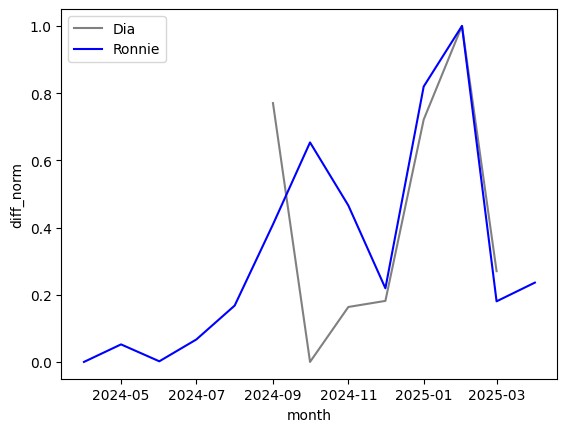

In [54]:
sns.lineplot(x = 'month', y ='diff_norm', data = dia_month_df, c = 'grey', label = 'Dia')
sns.lineplot(x = 'month', y ='diff_norm', data = ronnie_month_df, c = 'blue', label = 'Ronnie')

plt.legend()
plt.show()

**What do you notice by looking at both partners' data together that you didn't notice looking at the on their own?**

Ronnie noticed that my data was way shorter than his. We surprisingly also noticed that there is a very similair trend during and after December 2024.  

# PART 4: Analyzing my Own Data

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [56]:
# upload the data
data = pd.read_csv('Connections.csv', skiprows=3)
data

,First Name,Last Name,URL,Email Address,Company,Position,Connected On
0,Ashley,Lynn,https://www.linkedin.com/in/ashley-lynn-40a088251,NaN,NaN,NaN,17 Mar 2025
1,Maleda,Sims,https://www.linkedin.com/in/maleda-sims,NaN,Comprehensive Healthcare,Behavioral Health Associate,17 Mar 2025
2,Siena,Kinsley,https://www.linkedin.com/in/siena-kinsley2027,NaN,Paisley's Tea Room,Chef,17 Mar 2025
3,Arina,Gushchina,https://www.linkedin.com/in/arina-gushchina-95...,NaN,Goldman Sachs,2025 Goldman Sachs Possibilities Summit,17 Mar 2025
4,Alex,Ochoa,https://www.linkedin.com/in/alex-ochoa-b0a846355,NaN,Whitman College,Financial Aid Student Worker,17 Mar 2025
...,...,...,...,...,...,...,...
180,Arham,Khan,https://www.linkedin.com/in/arhamkhan99,NaN,Beta Theta Pi,VP of Communications and DEI,13 Sep 2024
181,John,Leeds,https://www.linkedin.com/in/john-leeds,NaN,Jane Street,Software Engineer Intern,13 Sep 2024
182,Vinny,Fertrin,https://www.linkedin.com/in/vinny-fertrin,NaN,HiddenLayer,Software Engineer Intern,13 Sep 2024
183,Mohamed,Abonazel,https://www.linkedin.com/in/mohamed-abonazel4,NaN,iVolve Technologies,DevOps Engineer,13 Sep 2024


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   First Name     185 non-null    object
 1   Last Name      185 non-null    object
 2   URL            185 non-null    object
 3   Email Address  1 non-null      object
 4   Company        174 non-null    object
 5   Position       174 non-null    object
 6   Connected On   185 non-null    object
dtypes: object(7)
memory usage: 10.2+ KB


**Question**: Which connections do I have that hold postions as Data Scientists? Are they in Whitman or work in Actual Companies?


In [58]:
# Handling the missing values

if 'Email Address' in data.columns:
  data.drop('Email Address', axis = 1, inplace = True)

df = data.dropna().reset_index(drop = True)
df

,First Name,Last Name,URL,Company,Position,Connected On
0,Maleda,Sims,https://www.linkedin.com/in/maleda-sims,Comprehensive Healthcare,Behavioral Health Associate,17 Mar 2025
1,Siena,Kinsley,https://www.linkedin.com/in/siena-kinsley2027,Paisley's Tea Room,Chef,17 Mar 2025
2,Arina,Gushchina,https://www.linkedin.com/in/arina-gushchina-95...,Goldman Sachs,2025 Goldman Sachs Possibilities Summit,17 Mar 2025
3,Alex,Ochoa,https://www.linkedin.com/in/alex-ochoa-b0a846355,Whitman College,Financial Aid Student Worker,17 Mar 2025
4,Brandon,Martínez Serrano,https://www.linkedin.com/in/brandonams,The STAR Project Walla Walla,Recovery Program Operations Assistant,17 Mar 2025
...,...,...,...,...,...,...
169,Arham,Khan,https://www.linkedin.com/in/arhamkhan99,Beta Theta Pi,VP of Communications and DEI,13 Sep 2024
170,John,Leeds,https://www.linkedin.com/in/john-leeds,Jane Street,Software Engineer Intern,13 Sep 2024
171,Vinny,Fertrin,https://www.linkedin.com/in/vinny-fertrin,HiddenLayer,Software Engineer Intern,13 Sep 2024
172,Mohamed,Abonazel,https://www.linkedin.com/in/mohamed-abonazel4,iVolve Technologies,DevOps Engineer,13 Sep 2024


In [59]:
# Extracting out the data scientists
data_scientists = df[df['Position'].str.contains('Data')]
data_scientists

,First Name,Last Name,URL,Company,Position,Connected On
16,Grant,Laco,https://www.linkedin.com/in/grantlaco,T-Mobile,Data Scientist,10 Jan 2025
55,Brian,Abelson,https://www.linkedin.com/in/brian-abelson-3558...,"Reddit, Inc.",Senior Data Engineer,01 Nov 2024
103,Meron,Semere,https://www.linkedin.com/in/meron-z-semere,Carnegie Mellon University - Heinz College of ...,Data Analytics Fellow,12 Oct 2024
138,Siddharth R,Kumar,https://www.linkedin.com/in/siddharth-r-kumar-...,BDB.ai,Data Scientist,20 Sep 2024
142,Zurain,Zeeshan,https://www.linkedin.com/in/zurain-zeeshan,Reply,Data Analytics - Associate Consultant,18 Sep 2024
164,Hayden,Garner,https://www.linkedin.com/in/hayden-garner-7603...,Whitman College,Climate Data Assistant,14 Sep 2024


In [60]:
# Grouping by company and whitman

whitman_data_scientists = data_scientists[data_scientists['Company'].str.contains('Whitman')]
other_data_scientists = data_scientists[~data_scientists['Company'].str.contains('Whitman')]
other_data_scientists['Company'] = 'Other'


<ipython-input-60-354aa13f40d6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_data_scientists['Company'] = 'Other'


**Visualize**

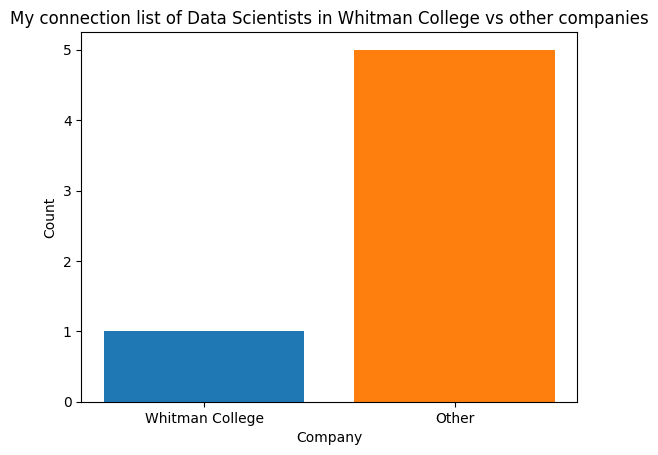

In [61]:
plt.bar(whitman_data_scientists['Company'], whitman_data_scientists['Company'].count())
plt.bar(other_data_scientists['Company'], other_data_scientists['Company'].count())


plt.title('My connection list of Data Scientists in Whitman College vs other companies')
plt.xlabel('Company')
plt.ylabel('Count')
plt.show()

**Question:** When did I connect with non-Whitman users? and for which companies?

In [62]:
no_whitman_df = df[~df['Company'].str.contains('Whitman')]

no_whitman_df['Connected On'] = pd.to_datetime(df['Connected On'], dayfirst=True)

companies_by_time = no_whitman_df.groupby('Connected On')['Company'].apply(list).sort_index()
companies_by_time.head()

<ipython-input-62-4c9cb947ef2a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_whitman_df['Connected On'] = pd.to_datetime(df['Connected On'], dayfirst=True)


,Company
Connected On,
2024-01-03,[NVIDIA]
2024-09-13,"[Walla Walla Valley Chamber of Commerce, Beta ..."
2024-09-14,"[Microsoft, Deer Valley Resort, MulticoreWare ..."
2024-09-15,"[Code Savanna, Adobe, Amazon Web Services (AWS)]"
2024-09-16,"[Jenni AI, Insight, Paul G. Allen School of Co..."


In [63]:
companies_df = pd.DataFrame({'Date Connected': companies_by_time.index,'Company': companies_by_time.values})
companies_df.head()

,Date Connected,Company
0,2024-01-03,[NVIDIA]
1,2024-09-13,"[Walla Walla Valley Chamber of Commerce, Beta ..."
2,2024-09-14,"[Microsoft, Deer Valley Resort, MulticoreWare ..."
3,2024-09-15,"[Code Savanna, Adobe, Amazon Web Services (AWS)]"
4,2024-09-16,"[Jenni AI, Insight, Paul G. Allen School of Co..."


**Visualization**

Text(0, 0.5, 'Count')

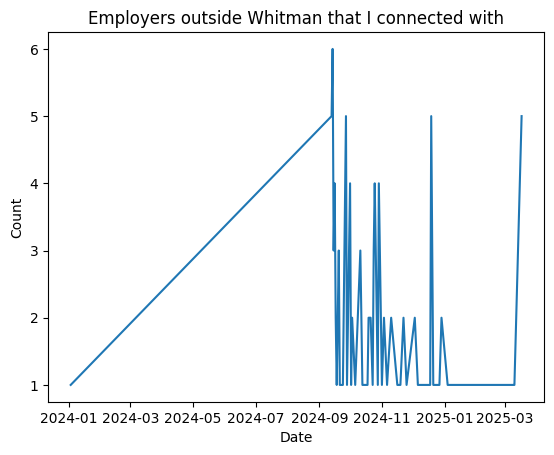

In [64]:
plt.plot(companies_df['Date Connected'], companies_df['Company'].apply(len))

plt.title('Employers outside Whitman that I connected with')
plt.xlabel('Date')
plt.ylabel('Count')